### COVID-19.NG, The first 200days.

This project is a soft analysis of the COVID-19 data available for nigeria since we had our first case over 200 days ago. it is an analysis of the first 211 days. it spans from the 28/02/2020 - 25/09/2020 .

The dataset was gotten from https://github.com/JovianML/opendatasets a package containing numerous datasets compiled by the jovain.ML team who also took me through a course on data analysis(https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas).

I want to say thank you to the Jovian.ML team as I had a wonderful learning experience.

I am going to make the code in the subsequent sections simple and well documented so as to help others who are interested in python for data analysis. 

In [1]:
'''Here we are going to import all the necessary libraries we are going to need for the project.
Numpy and Pandas for data manipulation and then matplotlib and seaborn for visualization'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline 
#This allows us visualize our charts right here in the notebook

In the cell below  we are going to read the already downloaded csv file with the help of pandas.

The source of the dataset is above in the first markdown block.


In [2]:
covid_df = pd.read_csv('owid-covid-data.csv')
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46057,NaN,NaN,International,2020-09-21,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46058,NaN,NaN,International,2020-09-22,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46059,NaN,NaN,International,2020-09-23,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46060,NaN,NaN,International,2020-09-24,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preparation and Cleaning

The dataset above contains covid data across all countries but we are only interested in covid data for nigeria so we are going to extract the dataset for only nigeria from the above but first we would create a copy of this dataset so that we can always recall the original dataset.


In [3]:
covid_df_copy = covid_df.copy()

Looking at the dataset above we can see that there is a column for location. Since we are interested in only the data for nigeria we can take advantage of that column to extract the data for nigeria.

In [4]:
covid_df_ng = covid_df[covid_df.location == 'Nigeria']
covid_df_ng

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
30961,NGA,Africa,Nigeria,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
30962,NGA,Africa,Nigeria,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
30963,NGA,Africa,Nigeria,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
30964,NGA,Africa,Nigeria,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
30965,NGA,Africa,Nigeria,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31226,NGA,Africa,Nigeria,2020-09-21,57242.0,97.0,140.857,1098.0,3.0,2.286,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31227,NGA,Africa,Nigeria,2020-09-22,57437.0,195.0,149.857,1100.0,2.0,2.429,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31228,NGA,Africa,Nigeria,2020-09-23,57613.0,176.0,162.143,1100.0,0.0,1.714,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31229,NGA,Africa,Nigeria,2020-09-24,57724.0,111.0,160.000,1102.0,2.0,1.571,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532


Examining this dataset closely we can see that several things are wrong with it. Firstly,the data collection begins before nigeria had her first case and the index of the dataframe should preferably start from 0 so we are going to attempt to correct it.

In [5]:
covid_df_ng[covid_df_ng.total_cases > 0] #exploiting the total cases colums to find nigeria's first case 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
31020,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31021,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31022,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31023,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31031,NGA,Africa,Nigeria,2020-03-10,2.0,1.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31226,NGA,Africa,Nigeria,2020-09-21,57242.0,97.0,140.857,1098.0,3.0,2.286,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31227,NGA,Africa,Nigeria,2020-09-22,57437.0,195.0,149.857,1100.0,2.0,2.429,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31228,NGA,Africa,Nigeria,2020-09-23,57613.0,176.0,162.143,1100.0,0.0,1.714,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31229,NGA,Africa,Nigeria,2020-09-24,57724.0,111.0,160.000,1102.0,2.0,1.571,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532


We can see from the above that nigeria had her first case on the 28th of feb(at index 31020). This can be validated with a quick google search. we can then take advantage of the index location so that our dataframe begins from the 28th of february.

In [6]:
covid_df_ng = covid_df_ng.loc[31020:] 
covid_df_ng

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
31020,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31021,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31022,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31023,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31024,NGA,Africa,Nigeria,2020-03-03,NaN,NaN,0.143,NaN,NaN,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31226,NGA,Africa,Nigeria,2020-09-21,57242.0,97.0,140.857,1098.0,3.0,2.286,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31227,NGA,Africa,Nigeria,2020-09-22,57437.0,195.0,149.857,1100.0,2.0,2.429,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31228,NGA,Africa,Nigeria,2020-09-23,57613.0,176.0,162.143,1100.0,0.0,1.714,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
31229,NGA,Africa,Nigeria,2020-09-24,57724.0,111.0,160.000,1102.0,2.0,1.571,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532


Now to correct the indexing as stated earlier we create a numpy array from 0-210(211 numbers essentially) because the dataframe above has 211 rows. We then call the `.set_index method` on it and perform the operation inplace.

In [7]:
covid_df_ng.set_index(np.arange(0, 211), inplace= True)
covid_df_ng

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
1,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
2,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
3,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,0.143,0.0,0.0,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
4,NGA,Africa,Nigeria,2020-03-03,NaN,NaN,0.143,NaN,NaN,0.000,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,NGA,Africa,Nigeria,2020-09-21,57242.0,97.0,140.857,1098.0,3.0,2.286,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
207,NGA,Africa,Nigeria,2020-09-22,57437.0,195.0,149.857,1100.0,2.0,2.429,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
208,NGA,Africa,Nigeria,2020-09-23,57613.0,176.0,162.143,1100.0,0.0,1.714,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532
209,NGA,Africa,Nigeria,2020-09-24,57724.0,111.0,160.000,1102.0,2.0,1.571,...,5338.454,NaN,181.013,2.42,0.6,10.8,41.949,NaN,54.69,0.532


The dataframe above has 41 columns which is far more than wee need fo rthis particular analysis. So
we have to read the file that contains what each column means and then decide on which ones to drop.

In [8]:
covid_data_info = pd.read_csv('owid-covid-codebook.csv')
covid_data_info

,column,description,source
0,iso_code,ISO 3166-1 alpha-3 – three-letter country codes,International Organization for Standardization
1,continent,Continent of the geographical location,Our World in Data
2,location,Geographical location,Our World in Data
3,date,Date of observation,Our World in Data
4,total_cases,Total confirmed cases of COVID-19,European Centre for Disease Prevention and Con...
5,new_cases,New confirmed cases of COVID-19,European Centre for Disease Prevention and Con...
6,new_cases_smoothed,New confirmed cases of COVID-19 (7-day smoothed),European Centre for Disease Prevention and Con...
7,total_deaths,Total deaths attributed to COVID-19,European Centre for Disease Prevention and Con...
8,new_deaths,New deaths attributed to COVID-19,European Centre for Disease Prevention and Con...
9,new_deaths_smoothed,New deaths attributed to COVID-19 (7-day smoot...,European Centre for Disease Prevention and Con...


In [9]:
covid_df_ng.info() #code to get some additional info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         211 non-null    object 
 1   continent                        211 non-null    object 
 2   location                         211 non-null    object 
 3   date                             211 non-null    object 
 4   total_cases                      200 non-null    float64
 5   new_cases                        200 non-null    float64
 6   new_cases_smoothed               211 non-null    float64
 7   total_deaths                     200 non-null    float64
 8   new_deaths                       200 non-null    float64
 9   new_deaths_smoothed              211 non-null    float64
 10  total_cases_per_million          200 non-null    float64
 11  new_cases_per_million            200 non-null    float64
 12  new_cases_smoothed_per

The output above shows that many columns have several null values. The implication of this is that
we can not replace the null values when they are excessive whereas we can replace them with 
other values(maybe average or median values) when they are not so much. To grasp the data in the
output above better, it is good idea to visualize it using a heatmap.


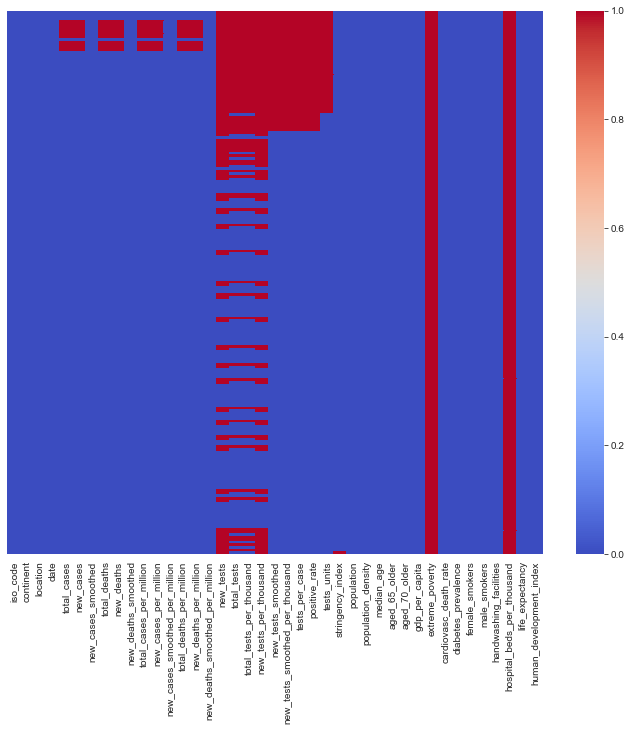

In [10]:
plt.figure(figsize=(12, 10))
sns.set_style('darkgrid') #this affects all the visualizations in al cells below
sns.heatmap(covid_df_ng.isnull(),yticklabels=False,cbar=True,cmap='coolwarm'); 

Now we have a good idea of the columns we are interested in we can go ahead and select those columns.

In [11]:
covid_df_ng.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [12]:
covid_df_ng = covid_df_ng[['date', 'total_cases', 'new_cases', 'total_deaths', 
        'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 
       'total_deaths_per_million', 'new_deaths_per_million',
        'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand','tests_per_case']]

In [13]:
covid_df_ng

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case
0,2020-02-28,1.0,1.0,0.0,0.0,0.005,0.005,0.000,0.000,NaN,NaN,NaN,NaN,NaN
1,2020-02-29,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2,2020-03-01,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
3,2020-03-02,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
4,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2020-09-21,57242.0,97.0,1098.0,3.0,277.686,0.471,5.326,0.015,NaN,480874.0,2.333,NaN,39.352
207,2020-09-22,57437.0,195.0,1100.0,2.0,278.632,0.946,5.336,0.010,NaN,NaN,NaN,NaN,36.675
208,2020-09-23,57613.0,176.0,1100.0,0.0,279.485,0.854,5.336,0.000,NaN,484051.0,2.348,NaN,27.013
209,2020-09-24,57724.0,111.0,1102.0,2.0,280.024,0.538,5.346,0.010,NaN,NaN,NaN,NaN,23.681


Now that we have a dataframe fit to our taste we can now manipulate the data further by either replacing missing values if necessary or correcting values that are likely incorrect.

In [14]:
covid_df_ng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      211 non-null    object 
 1   total_cases               200 non-null    float64
 2   new_cases                 200 non-null    float64
 3   total_deaths              200 non-null    float64
 4   new_deaths                200 non-null    float64
 5   total_cases_per_million   200 non-null    float64
 6   new_cases_per_million     200 non-null    float64
 7   total_deaths_per_million  200 non-null    float64
 8   new_deaths_per_million    200 non-null    float64
 9   new_tests                 104 non-null    float64
 10  total_tests               131 non-null    float64
 11  total_tests_per_thousand  131 non-null    float64
 12  new_tests_per_thousand    104 non-null    float64
 13  tests_per_case            164 non-null    float64
dtypes: float64

In [15]:
covid_df_ng.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,104.000000,131.000000,131.000000,104.000000,164.000000
mean,23371.95000,289.245000,493.735000,5.510000,113.379270,1.403170,2.395140,0.026760,3009.346154,201910.251908,0.979511,0.014548,9.655366
std,21393.40388,218.309436,410.272363,5.379087,103.781135,1.059023,1.990278,0.026054,3185.784123,151177.115956,0.733381,0.015479,6.942969
min,1.00000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,504.000000,5000.000000,0.024000,0.002000,3.769000
25%,1483.25000,99.250000,43.000000,1.000000,7.195500,0.481500,0.208250,0.005000,1722.000000,64883.500000,0.315000,0.008000,5.221750
50%,17441.50000,251.000000,462.000000,4.000000,84.610000,1.217500,2.241000,0.019000,2499.000000,169629.000000,0.823000,0.012000,7.638500
75%,44978.50000,457.750000,927.750000,8.000000,218.194250,2.220500,4.500750,0.039000,3341.500000,347493.000000,1.686000,0.016000,11.417500
max,57849.00000,790.000000,1102.000000,31.000000,280.630000,3.832000,5.346000,0.150000,29602.000000,494577.000000,2.399000,0.144000,39.690000


From the data description above we can see that the max value of the new_tests column is 29602 which is likely a wrong value and should be corrected. what we can do is to visualize the entire column to compare it with other values and to pick out other wrong values and then either drop the entire column or replace the wrong values. Take note of the median value in the new_tests column.

In [16]:
pd.set_option('display.max_rows', 300) #code to display all rows
covid_df_ng.new_tests

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48         NaN
49       504.0
50         NaN
51         NaN
52         NaN
53         NaN
54         NaN
55         NaN
56         NaN
57         NaN
58         NaN
59         NaN
60         NaN
61       824.0
62         NaN
63         NaN
64         NaN
65         NaN
66      19

After inspecting the series above we identified to values that are likely wrong at index 145 and 158 we will then go ahead to replace those values with the median values of tthe columns as stated earlier median values punish outliers as opposed to mode values.

In [17]:
covid_df_ng[covid_df_ng.new_tests == 29602] 

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case
145,2020-07-22,37801.0,576.0,805.0,4.0,183.376,2.794,3.905,0.019,29602.0,247825.0,1.202,0.144,11.663


Bacause we are working on a copy of our first dataframe and manipulation done here is going to affect the initial dataframe we are going to get a warning(not error) in the output cell. we can ignore all waring by using this code:

`import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)`

However for the sake of this analysis and the possibility of it being used by beginners we are going to allow the warnings to occur

Recall we already created a copy of our dataframe earlier so we can manipulate it as we wish.

In [18]:
covid_df_ng.new_tests.loc[145] = 2499


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-18-8981f63e6d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_ng.new_tests.loc[145] = 2499


In [19]:
covid_df_ng[covid_df_ng.new_tests == 29602]

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case


In [20]:
covid_df_ng[covid_df_ng.new_tests == 15088] 

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case
158,2020-08-04,44129.0,288.0,896.0,8.0,214.073,1.397,4.347,0.039,15088.0,304221.0,1.476,0.073,10.672


In [21]:
covid_df_ng.new_tests.loc[158] = 2499

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-21-909645051b60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_ng.new_tests.loc[158] = 2499


Now we just inspect the dataframe again to be sure that all is well. We check its description and then go ahead to visualise the entire dataframe since the data is relatively small.

In [22]:
covid_df_ng.describe() 

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,104.000000,131.000000,131.000000,104.000000,164.000000
mean,23371.95000,289.245000,493.735000,5.510000,113.379270,1.403170,2.395140,0.026760,2627.692308,201910.251908,0.979511,0.014548,9.655366
std,21393.40388,218.309436,410.272363,5.379087,103.781135,1.059023,1.990278,0.026054,1313.406947,151177.115956,0.733381,0.015479,6.942969
min,1.00000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000,504.000000,5000.000000,0.024000,0.002000,3.769000
25%,1483.25000,99.250000,43.000000,1.000000,7.195500,0.481500,0.208250,0.005000,1722.000000,64883.500000,0.315000,0.008000,5.221750
50%,17441.50000,251.000000,462.000000,4.000000,84.610000,1.217500,2.241000,0.019000,2496.500000,169629.000000,0.823000,0.012000,7.638500
75%,44978.50000,457.750000,927.750000,8.000000,218.194250,2.220500,4.500750,0.039000,3305.750000,347493.000000,1.686000,0.016000,11.417500
max,57849.00000,790.000000,1102.000000,31.000000,280.630000,3.832000,5.346000,0.150000,8760.000000,494577.000000,2.399000,0.144000,39.690000


In [23]:
pd.set_option('display.max_rows', 300) #code to visualize the entire dataframe
covid_df_ng

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case
0,2020-02-28,1.0,1.0,0.0,0.0,0.005,0.005,0.000,0.000,NaN,NaN,NaN,NaN,NaN
1,2020-02-29,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2,2020-03-01,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
3,2020-03-02,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
4,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
pd.reset_option('display.max_rows') #code to stop us from visualizing the entire dataframe 
covid_df_ng


,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case
0,2020-02-28,1.0,1.0,0.0,0.0,0.005,0.005,0.000,0.000,NaN,NaN,NaN,NaN,NaN
1,2020-02-29,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
2,2020-03-01,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
3,2020-03-02,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
4,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2020-09-21,57242.0,97.0,1098.0,3.0,277.686,0.471,5.326,0.015,NaN,480874.0,2.333,NaN,39.352
207,2020-09-22,57437.0,195.0,1100.0,2.0,278.632,0.946,5.336,0.010,NaN,NaN,NaN,NaN,36.675
208,2020-09-23,57613.0,176.0,1100.0,0.0,279.485,0.854,5.336,0.000,NaN,484051.0,2.348,NaN,27.013
209,2020-09-24,57724.0,111.0,1102.0,2.0,280.024,0.538,5.346,0.010,NaN,NaN,NaN,NaN,23.681


In [25]:
covid_df_ng.sample(10) #code to visualize 10 random samples from the dataframe


,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case
156,2020-08-02,43537.0,386.0,883.0,4.0,211.202,1.873,4.284,0.019,1441.0,287532.0,1.395,0.007,7.010
161,2020-08-07,45244.0,354.0,930.0,3.0,219.482,1.717,4.512,0.015,3835.0,310729.0,1.507,0.019,10.899
197,2020-09-12,56017.0,188.0,1076.0,1.0,271.743,0.912,5.220,0.005,1904.0,438135.0,2.125,0.009,16.275
173,2020-08-19,49895.0,410.0,981.0,4.0,242.045,1.989,4.759,0.019,8135.0,363331.0,1.763,0.039,9.693
118,2020-06-25,22020.0,649.0,542.0,9.0,106.821,3.148,2.629,0.044,2047.0,122155.0,0.593,0.010,3.769
181,2020-08-27,53021.0,221.0,1010.0,3.0,257.209,1.072,4.900,0.015,3156.0,391502.0,1.899,0.015,9.971
150,2020-07-27,40532.0,555.0,858.0,2.0,196.624,2.692,4.162,0.010,5263.0,267842.0,1.299,0.026,13.604
75,2020-05-13,4787.0,146.0,158.0,8.0,23.222,0.708,0.766,0.039,990.0,29408.0,0.143,0.005,4.462
69,2020-05-07,3145.0,195.0,103.0,5.0,15.257,0.946,0.500,0.024,1284.0,22492.0,0.109,0.006,5.785
16,2020-03-15,2.0,0.0,0.0,0.0,0.010,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN


### Exploratory Analysis and Visualization

Now that our data is clean enough we can go ahead to explore it and do some visualizations to further have an understanding of the dataset and find possible trends and patterns.

The seaborn and matplotlib libraries are going to be particularly useful here.

In [26]:
from cycler import cycler
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['lines.linestyle'] = '-'
matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['b', 'c', 'b', 'k'])

#review the documentation

The block of code above is used to format all visualizations below it. We can however still format our visualizations in-line as in-line formatting will override this.

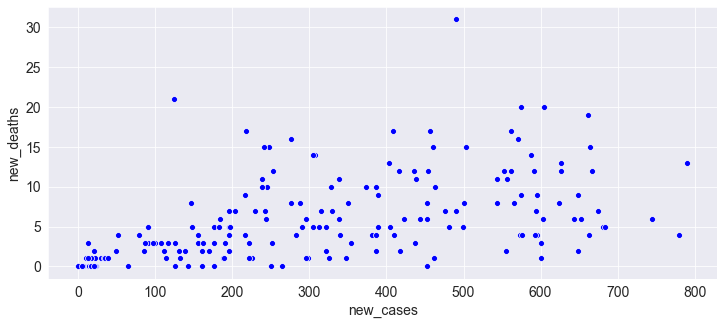

In [27]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.scatterplot('new_cases', 'new_deaths',data = covid_df_ng);

The graph above is called a scatterplot. In it we plotted  the number of new deaths vs the number of new cases and it doesnt appear that there is a clear relationship between the two.
A line graph might help to increase our clarity. 

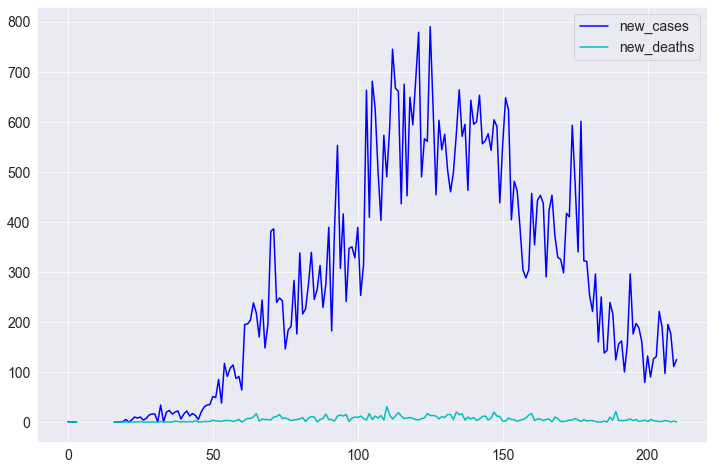

In [28]:
plt.figure(figsize=(12,8))
covid_df_ng.new_cases.plot()
covid_df_ng.new_deaths.plot()
plt.legend(['new_cases', 'new_deaths']);

The cell above shows a line graph. There appears to be no relationship between the number of new cases and the number of new deaths. This may however be because scale for the new deaths graph is too large so instead of plotting them on the same graph we will plot them side by side.

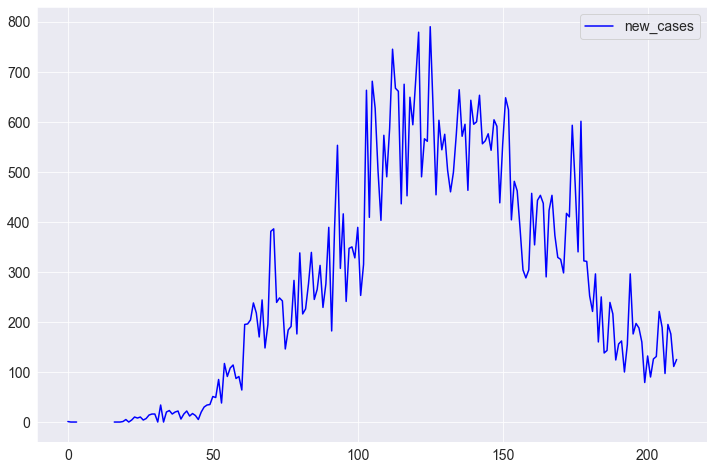

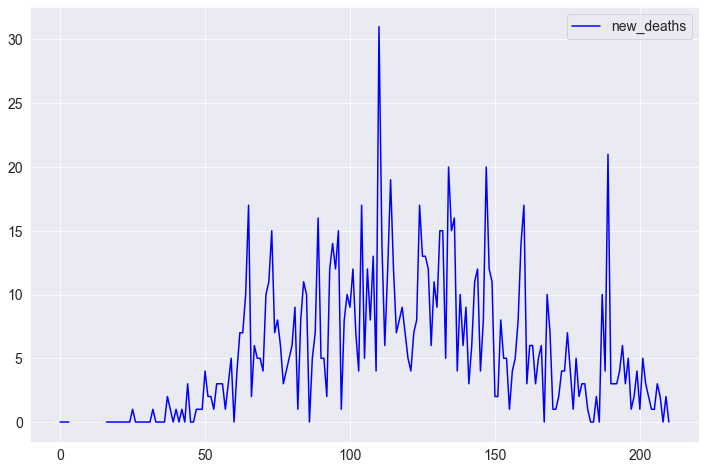

In [29]:

plt.figure(figsize=(12,8))
covid_df_ng.new_cases.plot()
plt.legend(['new_cases']);


plt.figure(figsize=(12,8))
covid_df_ng.new_deaths.plot()
plt.legend(['new_deaths']);



Seeing the graphs side by side with each having an appropriate scale we can see that there is a rough correlation between the number of tests and the number of cases.

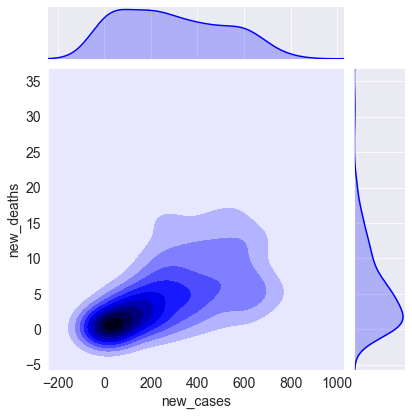

In [30]:
sns.jointplot('new_cases','new_deaths', data= covid_df_ng, kind='kde');

The above visualization is a jointplot. With it we can join two different plots together to gain more insight into datasets. In this case new deaths vs new cases.

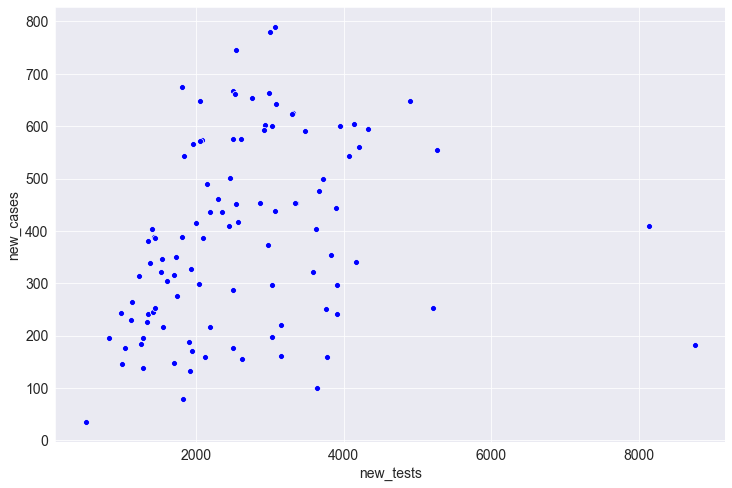

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot('new_tests', 'new_cases',data = covid_df_ng);

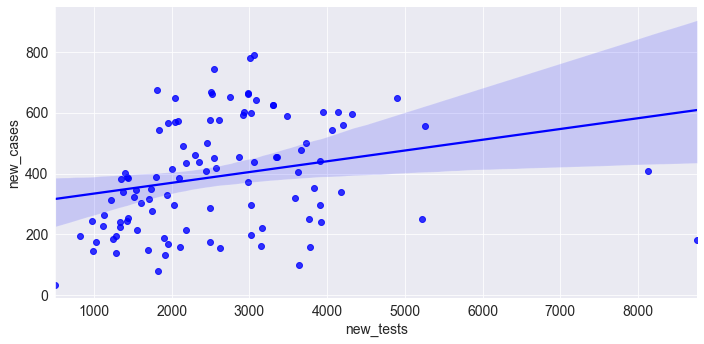

In [32]:
sns.lmplot('new_tests', 'new_cases',data = covid_df_ng, height=5, aspect=2);

The above is a regression plot and with it we can predict new cases whenever we get new tests data. The plot above however high variance and predictions won't be very accurate.

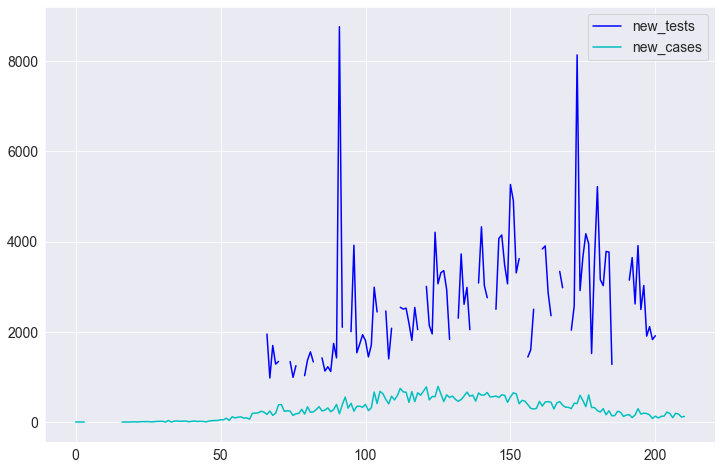

In [33]:
plt.figure(figsize=(12,8))
covid_df_ng.new_tests.plot()
covid_df_ng.new_cases.plot()
plt.legend(['new_tests', 'new_cases']);

### Asking and Answering Questions

In [34]:
covid_df_ng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      211 non-null    object 
 1   total_cases               200 non-null    float64
 2   new_cases                 200 non-null    float64
 3   total_deaths              200 non-null    float64
 4   new_deaths                200 non-null    float64
 5   total_cases_per_million   200 non-null    float64
 6   new_cases_per_million     200 non-null    float64
 7   total_deaths_per_million  200 non-null    float64
 8   new_deaths_per_million    200 non-null    float64
 9   new_tests                 104 non-null    float64
 10  total_tests               131 non-null    float64
 11  total_tests_per_thousand  131 non-null    float64
 12  new_tests_per_thousand    104 non-null    float64
 13  tests_per_case            164 non-null    float64
dtypes: float64

From the output cell above we can see that all columns are 64 bit floating points (simple term = decimal number) whereas the date column is an object and thus cannot be manipulated properly i.e like a date. In order to manipulate the date and make inferences based on time i.e days, months, we can convert the date object into datetime format using pandas.

In [35]:
covid_df_ng['date'] = pd.to_datetime(covid_df_ng.date)
covid_df_ng.date

<ipython-input-35-2465b326d66e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_ng['date'] = pd.to_datetime(covid_df_ng.date)


0     2020-02-28
1     2020-02-29
2     2020-03-01
3     2020-03-02
4     2020-03-03
         ...    
206   2020-09-21
207   2020-09-22
208   2020-09-23
209   2020-09-24
210   2020-09-25
Name: date, Length: 211, dtype: datetime64[ns]

Now that we have converted the date column into datetime format we can then create columns each for the year, month, day and weekday so that we can call on each individually and possible group the datasets using the `.groupby` method.

In [36]:
covid_df_ng['year'] = pd.DatetimeIndex(covid_df_ng.date).year
covid_df_ng['month'] = pd.DatetimeIndex(covid_df_ng.date).month
covid_df_ng['day'] = pd.DatetimeIndex(covid_df_ng.date).day
covid_df_ng['weekday'] = pd.DatetimeIndex(covid_df_ng.date).weekday

<ipython-input-36-b5b5c9ba8a2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_ng['year'] = pd.DatetimeIndex(covid_df_ng.date).year
<ipython-input-36-b5b5c9ba8a2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_ng['month'] = pd.DatetimeIndex(covid_df_ng.date).month
<ipython-input-36-b5b5c9ba8a2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [37]:
covid_df_ng

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,tests_per_case,year,month,day,weekday
0,2020-02-28,1.0,1.0,0.0,0.0,0.005,0.005,0.000,0.000,NaN,NaN,NaN,NaN,NaN,2020,2,28,4
1,2020-02-29,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,2020,2,29,5
2,2020-03-01,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,2020,3,1,6
3,2020-03-02,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,2020,3,2,0
4,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2020-09-21,57242.0,97.0,1098.0,3.0,277.686,0.471,5.326,0.015,NaN,480874.0,2.333,NaN,39.352,2020,9,21,0
207,2020-09-22,57437.0,195.0,1100.0,2.0,278.632,0.946,5.336,0.010,NaN,NaN,NaN,NaN,36.675,2020,9,22,1
208,2020-09-23,57613.0,176.0,1100.0,0.0,279.485,0.854,5.336,0.000,NaN,484051.0,2.348,NaN,27.013,2020,9,23,2
209,2020-09-24,57724.0,111.0,1102.0,2.0,280.024,0.538,5.346,0.010,NaN,NaN,NaN,NaN,23.681,2020,9,24,3


Question 1: In what month did nigeria have its highest number of new COVID-19 cases

To answer this question we are going to first of all group the dataset by each month.

Note: 1-12: January to december<br>
      
      0-6: Monday to sunday

In [38]:
covid_month_df = covid_df_ng.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
2,1.0,0.0,0.0
3,130.0,2.0,0.0
4,1597.0,49.0,1328.0
5,8127.0,222.0,35033.0
6,15278.0,300.0,50679.0
7,17556.0,305.0,79894.0
8,11176.0,135.0,77569.0
9,3984.0,89.0,28777.0


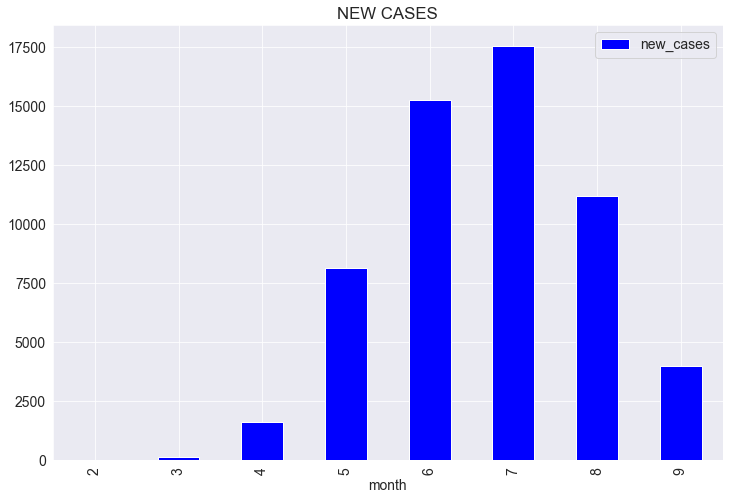

In [39]:
#additional code is needed to plot with the index(month ) column
covid_month_df.reset_index().plot(x = 'month', y='new_cases', kind = 'bar');
plt.title('NEW CASES');

The bar chart above shows that the highest number of new cases occured in july.


Question 2: In what month did nigeria have its highest number of COVID-19 related deaths.

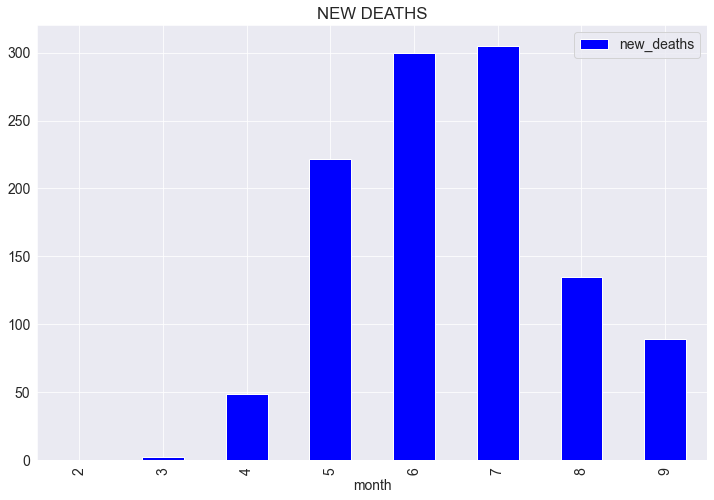

In [40]:
covid_month_df.reset_index().plot(x = 'month', y='new_deaths', kind = 'bar')
plt.title('NEW DEATHS');

The bar chart above shows that the highest number of deaths occured in july. Which as we have seen above is the month the highest number of cases occured.


Question 3: In what month were the highest number of tests performed.

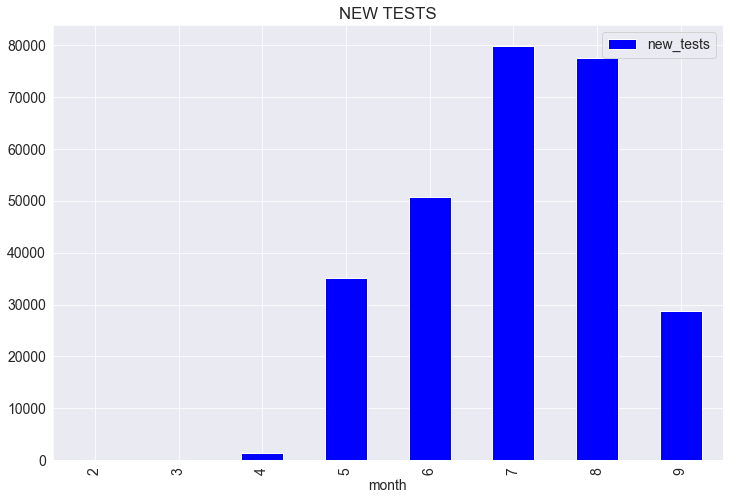

In [41]:
covid_month_df.reset_index().plot(x = 'month', y='new_tests', kind = 'bar')
plt.title('NEW TESTS');

The highest number of tests were also carried out in july.


Question 4: What is the total number of cases, deaths and how many tests have been carried out do far in nigeria.

In [42]:
total_cases = covid_month_df.new_cases.sum()

print(f'The total number of COVID-19 cases in Nigeria is {total_cases}')

The total number of COVID-19 cases in Nigeria is 57849.0


In [43]:
total_deaths = covid_month_df.new_deaths.sum()

print(f'The total number of COVID-19 related deaths in Nigeria is {total_deaths}')

The total number of COVID-19 related deaths in Nigeria is 1102.0


In [44]:
total_tests = covid_month_df.new_tests.sum()

print(f'The total number of COVID-19 tests done in Nigeria is {total_tests}')

The total number of COVID-19 tests done in Nigeria is 273280.0




Question 5: In what month was the highest death rate recorded

Key: `death_rate = (deaths / cases) * 100`

In [60]:
death_rate_ng = (covid_month_df.new_deaths/ covid_month_df.new_cases) * 100
death_rate_ng

month
2    0.000000
3    1.538462
4    3.068253
5    2.731635
6    1.963608
7    1.737298
8    1.207946
9    2.233936
dtype: float64

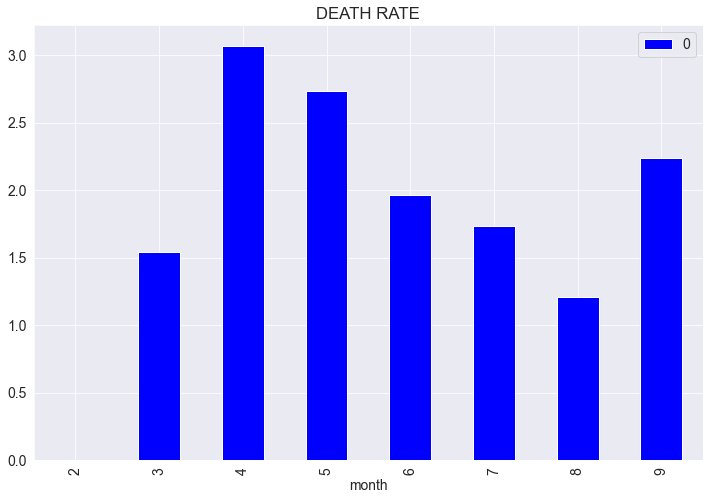

In [64]:
death_rate_ng.reset_index().plot(x = 'month', kind = 'bar')
plt.title('DEATH RATE');

The highest death rate was recorded in march.


Question 6: What is the overall death rate .

In [65]:
overall_death_rate_ng = (total_deaths / total_cases) * 100

print("The overall COVID-19 related death rate in Nigeria is  {:.2f} %.".format(overall_death_rate_ng))

The overall COVID-19 related death rate in Nigeria is  1.90 %.


Question 7: What is the overall positive rate for COVID-19 in Nigeria
    
Note: `positive rate = (total_cases / total_tests) * 100`

In [66]:
positive_rate_ng = (total_cases / total_tests) * 100

print("The positivity rate for  COVID-19 in Nigeria is  {:.2f} %.".format(positive_rate_ng))

The positivity rate for  COVID-19 in Nigeria is  21.17 %.


In [69]:
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46057,NaN,NaN,International,2020-09-21,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46058,NaN,NaN,International,2020-09-22,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46059,NaN,NaN,International,2020-09-23,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46060,NaN,NaN,International,2020-09-24,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Summary of Findings

-  The highest number of  cases occured in july, similarly the highest number of deaths occured in july.
2. The highest number of tests were carried out in july.
3. The total number of cases as at 2020-09-25 09:50:21 in Nigeria is 57849.
4. The total number of tests carried out is 273280.
5. The positivity rate is 21.17% and the death rate is 1.9%.


### Inference and Conclusions

- The number of new COVID-19 cases appear to be falling and it is unlikely Nigeria has had a second wave, however it is likely that more testing would yield more results. The positivity rate per month may be a better metric to use.
- There seems to be a positive correlation between the number of tests done and the number of cases of COVID-19.
- Roughly one test in 5 yields a positive result. With a population of ~200 million Nigeria needs to carry out more tests.
- The death rate in Nigeria reflects the general low death rate seen in Africa.



### References and Future Work

This body of work is not nearly exhaustive, ideas for more work in this area include:
- A state by state analysis of COVID-19 data for Nigeria.
- A comparison of how Nigeria is handling the pandemic with that of other countries with similar demographic indices.
- Exploration into why Nigeria has a low date rate , the data might reveal something.


References:
- opendatasets Python library: https://github.com/JovianML/opendatasets
- Markdown for jupyter notebooks cheatsheet: https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
- Data Analysis with Python: Zero to Pandas: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas
- Python for Data Science and Machine Learning Bootcamp by Jose Portilla: https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5440650#questions

In [70]:
!pip install jovian --upgrade --quiet

In [71]:
import jovian

<IPython.core.display.Javascript object>

In [72]:
jovian.commit(project='COVID-19 Nigeria - An analysis of the first 200 days')

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Creating a new project "ocheotote97/COVID-19 Nigeria - An analysis of the first 200 days"
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ocheotote97/covid-19-nigeria-an-analysis-of-the-first-200-days


'https://jovian.ml/ocheotote97/covid-19-nigeria-an-analysis-of-the-first-200-days'